In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
len(train_set)

891

<AxesSubplot:>

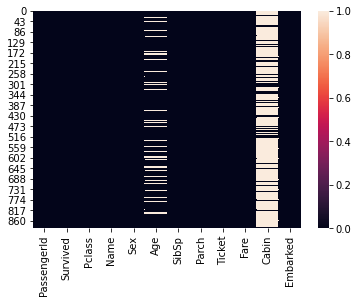

In [136]:
sns.heatmap(train_set.isnull())

In [137]:
train_set['Age'].isna().sum()

177

We have 177 missing age values which is a large number of missing values. We can not drop these records and need to find the appropriate method to impute the data in this column. 


Let us perform exploratory data anlaysis to check how the age varies with other parameters like gender 

<AxesSubplot:xlabel='Sex', ylabel='count'>

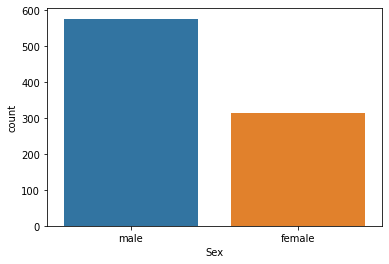

In [138]:
sns.countplot( x = 'Sex', data = train_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

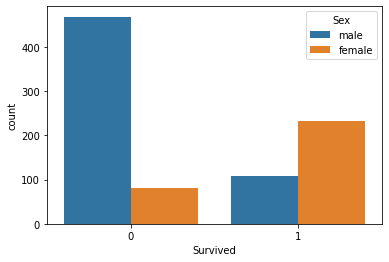

In [139]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_set)

<AxesSubplot:xlabel='Age', ylabel='Count'>

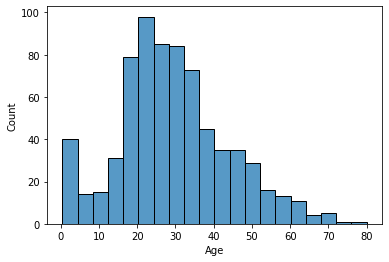

In [140]:
sns.histplot(train_set, x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

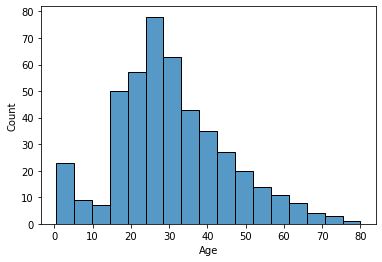

In [141]:
sns.histplot(train_set.loc[train_set['Sex'] == 'male'], x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

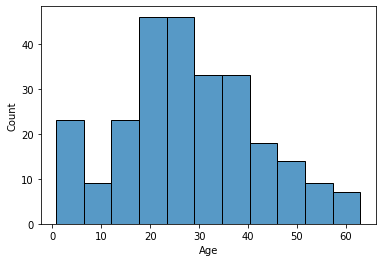

In [142]:
sns.histplot(train_set.loc[train_set['Sex'] == 'female'], x = 'Age')

In [143]:
mean = train_set['Age'].mean()
median = train_set['Age'].median()
mode = train_set['Age'].mode()
print(mean, median, mode)

29.69911764705882 28.0 0    24.0
dtype: float64


In [144]:
female_mean = train_set.loc[train_set['Sex'] == 'female']['Age'].mean()
female_median = train_set.loc[train_set['Sex'] == 'female']['Age'].median()
female_mode = train_set.loc[train_set['Sex'] == 'female']['Age'].mode()
print(female_mean, female_median, female_mode)

27.915708812260537 27.0 0    24.0
dtype: float64


In [145]:
male_mean = train_set.loc[train_set['Sex'] == 'male']['Age'].mean()
male_median = train_set.loc[train_set['Sex'] == 'male']['Age'].median()
male_mode = train_set.loc[train_set['Sex'] == 'male']['Age'].mode()
print(male_mean, male_median, male_mode)

30.72664459161148 29.0 0    19.0
1    25.0
2    28.0
dtype: float64


We can see that the mean and median age is different for different gender.

In [146]:
train_set = train_set.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'PassengerId', 'Parch'], axis = 1)
train_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,NaN,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_set['Sex'] = le.fit_transform(train_set['Sex'])

In [148]:
null_columns=train_set.columns[train_set.isnull().any()]
print(train_set[train_set["Age"].isnull()][null_columns])

     Age
5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
..   ...
859  NaN
863  NaN
868  NaN
878  NaN
888  NaN

[177 rows x 1 columns]


# Mean Imputation

Let us impute the missing age values with the mean values and check the accuracy of our model.

In [149]:
train_mean_set = train_set.copy()
train_mean_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,NaN,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,14.0,1,30.0708


In [150]:
import impyute as impy

In [151]:
import numpy as np
from sklearn.impute import SimpleImputer


In [152]:
train_mean_set['Age'] = np.where((train_mean_set.Sex == 1 & train_mean_set.Age.isnull()), male_mean, train_mean_set.Age)
train_mean_set['Age'] = np.where((train_mean_set.Sex == 0 & train_mean_set.Age.isnull()), female_mean, train_mean_set.Age)
train_mean_set['Age'].isna().sum()

0

In [153]:
print(train_mean_set.iloc[5]['Age'])
train_mean_set.head(10)

30.72664459161148


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.000000,1,7.2500
1,1,1,0,27.915709,1,71.2833
2,1,3,0,27.915709,0,7.9250
3,1,1,0,27.915709,1,53.1000
4,0,3,1,35.000000,0,8.0500
5,0,3,1,30.726645,0,8.4583
6,0,1,1,54.000000,0,51.8625
7,0,3,1,2.000000,3,21.0750
8,1,3,0,27.915709,0,11.1333
9,1,2,0,27.915709,1,30.0708


In [154]:
train_mean_set_x = train_mean_set.drop(['Survived'], axis = 1)
train_mean_set_y = train_mean_set['Survived']

In [155]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(train_mean_set_x, train_mean_set_y)

LogisticRegression(max_iter=1000)

In [156]:
# let us now split the training set into two: a training set and a validation set
# this way we can check the accuracy of our training model against actual values

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [157]:
X_mean_train, X_mean_test, Y_mean_train, Y_mean_test = train_test_split(train_mean_set_x, train_mean_set_y, test_size=0.25)
log_model.fit(X_mean_train, Y_mean_train)
predictions_mean_accurate = log_model.predict(X_mean_test)
print(log_model.score(X_mean_test, Y_mean_test))
print(classification_report(Y_mean_test, predictions_mean_accurate))
print(confusion_matrix(Y_mean_test, predictions_mean_accurate))

0.7757847533632287
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       123
           1       0.77      0.71      0.74       100

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.77       223

[[102  21]
 [ 29  71]]


We achieve an accuracy of ~76% using mean imputation to fill the missing data values.

# Median Imputation 

In [158]:
train_median_set = train_set.copy()
train_median_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,NaN,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,14.0,1,30.0708


In [159]:
train_median_set['Age'] = np.where((train_median_set.Sex == 1 & train_median_set.Age.isnull()), male_median, train_median_set.Age)
train_median_set['Age'] = np.where((train_median_set.Sex == 0 & train_median_set.Age.isnull()), female_median, train_median_set.Age)
train_median_set['Age'].isna().sum()

0

In [160]:
print(train_median_set.iloc[5]['Age'])
train_median_set.head(10)

29.0


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,27.0,1,71.2833
2,1,3,0,27.0,0,7.9250
3,1,1,0,27.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,29.0,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,27.0,1,30.0708


In [161]:
train_median_set_x = train_median_set.drop(['Survived'], axis = 1)
train_median_set_y = train_median_set['Survived']

In [162]:
log_model.fit(train_median_set_x, train_median_set_y)

LogisticRegression(max_iter=1000)

In [163]:
X_median_train, X_median_test, Y_median_train, Y_median_test = train_test_split(train_median_set_x, train_median_set_y, test_size=0.25)
log_model.fit(X_median_train, Y_median_train)
predictions_median_accurate = log_model.predict(X_median_test)
print(log_model.score(X_median_test, Y_median_test))
print(classification_report(Y_median_test, predictions_median_accurate))
print(confusion_matrix(Y_median_test, predictions_median_accurate))

0.8071748878923767
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       136
           1       0.80      0.68      0.73        87

    accuracy                           0.81       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223

[[121  15]
 [ 28  59]]


# Mode Imputation

In [164]:
train_mode_set = train_set.copy()
train_mode_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,NaN,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,14.0,1,30.0708


In [165]:
train_mode_set['Age'] = np.where((train_mode_set.Sex == 1 & train_mode_set.Age.isnull()), male_mode.iloc[0], train_mode_set.Age)
train_mode_set['Age'] = np.where((train_mode_set.Sex == 0 & train_mode_set.Age.isnull()), female_mode.iloc[0], train_mode_set.Age)
train_mode_set['Age'].isna().sum()

0

In [166]:
print(train_mode_set.iloc[5]['Age'])
train_mode_set.head(10)

19.0


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,24.0,1,71.2833
2,1,3,0,24.0,0,7.9250
3,1,1,0,24.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,19.0,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,24.0,0,11.1333
9,1,2,0,24.0,1,30.0708


In [167]:
train_mode_set_x = train_mode_set.drop(['Survived'], axis = 1)
train_mode_set_y = train_mode_set['Survived']

In [168]:
log_model.fit(train_mode_set_x, train_mode_set_y)

LogisticRegression(max_iter=1000)

In [169]:
X_mode_train, X_mode_test, Y_mode_train, Y_mode_test = train_test_split(train_mode_set_x, train_mode_set_y, test_size=0.25)
log_model.fit(X_mode_train, Y_mode_train)
predictions_mode_accurate = log_model.predict(X_mode_test)
print(log_model.score(X_mode_test, Y_mode_test))
print(classification_report(Y_mode_test, predictions_mode_accurate))
print(confusion_matrix(Y_mode_test, predictions_mode_accurate))

0.757847533632287
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       144
           1       0.65      0.67      0.66        79

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223

[[116  28]
 [ 26  53]]


# KNN Imputation using scikit learn

In [170]:
from sklearn.impute import KNNImputer
train_knn_set = train_set.copy()
train_knn_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,NaN,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,14.0,1,30.0708


In [171]:
imputer = KNNImputer(n_neighbors=5)
imputed_set = imputer.fit_transform(train_knn_set)
train_knn_set1 = pd.DataFrame(imputed_set, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])
train_knn_set1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0.0,3.0,1.0,22.0,1.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,8.0500
5,0.0,3.0,1.0,29.2,0.0,8.4583
6,0.0,1.0,1.0,54.0,0.0,51.8625
7,0.0,3.0,1.0,2.0,3.0,21.0750
8,1.0,3.0,0.0,27.0,0.0,11.1333
9,1.0,2.0,0.0,14.0,1.0,30.0708


In [172]:
train_knn_set1_x = train_knn_set1.drop(['Survived'], axis = 1)
train_knn_set1_y = train_knn_set1['Survived']

In [173]:
log_model.fit(train_knn_set1_x, train_knn_set1_y)

LogisticRegression(max_iter=1000)

In [174]:
X_knn_train, X_knn_test, Y_knn_train, Y_knn_test = train_test_split(train_knn_set1_x, train_knn_set1_y, test_size=0.25)
log_model.fit(X_knn_train, Y_knn_train)
predictions_knn_accurate = log_model.predict(X_knn_test)
print(log_model.score(X_knn_test, Y_knn_test))
print(classification_report(Y_knn_test, predictions_knn_accurate))
print(confusion_matrix(Y_knn_test, predictions_knn_accurate))

0.8161434977578476
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       136
         1.0       0.78      0.74      0.76        87

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.82      0.82       223

[[118  18]
 [ 23  64]]


# Mean, median and most frequent imputation using scikit learn

In [175]:
from sklearn.impute import SimpleImputer
train_skl_mean = train_set.copy()
train_skl_mean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,NaN,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,14.0,1,30.0708


In [176]:
meanimp = SimpleImputer(missing_values=np.nan, strategy='mean')
meanimp_arr = meanimp.fit_transform(train_skl_mean)
mean_impset = pd.DataFrame(meanimp_arr, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])
mean_impset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0.0,3.0,1.0,22.000000,1.0,7.2500
1,1.0,1.0,0.0,38.000000,1.0,71.2833
2,1.0,3.0,0.0,26.000000,0.0,7.9250
3,1.0,1.0,0.0,35.000000,1.0,53.1000
4,0.0,3.0,1.0,35.000000,0.0,8.0500
5,0.0,3.0,1.0,29.699118,0.0,8.4583
6,0.0,1.0,1.0,54.000000,0.0,51.8625
7,0.0,3.0,1.0,2.000000,3.0,21.0750
8,1.0,3.0,0.0,27.000000,0.0,11.1333
9,1.0,2.0,0.0,14.000000,1.0,30.0708


In [177]:
train_skl_median = train_set.copy()
train_skl_median.head(10)
medianimp = SimpleImputer(missing_values=np.nan, strategy='median')
medianimp_arr = medianimp.fit_transform(train_skl_median)
median_impset = pd.DataFrame(medianimp_arr, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])
median_impset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0.0,3.0,1.0,22.0,1.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,8.0500
5,0.0,3.0,1.0,28.0,0.0,8.4583
6,0.0,1.0,1.0,54.0,0.0,51.8625
7,0.0,3.0,1.0,2.0,3.0,21.0750
8,1.0,3.0,0.0,27.0,0.0,11.1333
9,1.0,2.0,0.0,14.0,1.0,30.0708


In [178]:
train_skl_mode = train_set.copy()
train_skl_mode.head(10)
modeimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
modeimp_arr = modeimp.fit_transform(train_skl_mode)
mode_impset = pd.DataFrame(modeimp_arr, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])
mode_impset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0.0,3.0,1.0,22.0,1.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,8.0500
5,0.0,3.0,1.0,24.0,0.0,8.4583
6,0.0,1.0,1.0,54.0,0.0,51.8625
7,0.0,3.0,1.0,2.0,3.0,21.0750
8,1.0,3.0,0.0,27.0,0.0,11.1333
9,1.0,2.0,0.0,14.0,1.0,30.0708


# Multivariate feature imputation (MICE) using scikit learn

In [179]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_skl_multi = train_set.copy()
train_skl_multi.head(10)
multi_imp = IterativeImputer(max_iter=10, random_state=0)
multi_imp_arr = multi_imp.fit_transform(train_skl_multi)
multi_impset = pd.DataFrame(multi_imp_arr, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])
multi_impset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0.0,3.0,1.0,22.000000,1.0,7.2500
1,1.0,1.0,0.0,38.000000,1.0,71.2833
2,1.0,3.0,0.0,26.000000,0.0,7.9250
3,1.0,1.0,0.0,35.000000,1.0,53.1000
4,0.0,3.0,1.0,35.000000,0.0,8.0500
5,0.0,3.0,1.0,28.928817,0.0,8.4583
6,0.0,1.0,1.0,54.000000,0.0,51.8625
7,0.0,3.0,1.0,2.000000,3.0,21.0750
8,1.0,3.0,0.0,27.000000,0.0,11.1333
9,1.0,2.0,0.0,14.000000,1.0,30.0708


In [180]:
multi_imp_set_x = multi_impset.drop(['Survived'], axis = 1)
multi_imp_set_y = multi_impset['Survived']

In [181]:
log_model.fit(train_knn_set1_x, train_knn_set1_y)

LogisticRegression(max_iter=1000)

In [182]:
X_multi_train, X_multi_test, Y_multi_train, Y_multi_test = train_test_split(multi_imp_set_x, multi_imp_set_y, test_size=0.25)
log_model.fit(X_multi_train, Y_multi_train)
predictions_multi_accurate = log_model.predict(X_multi_test)
print(log_model.score(X_multi_test, Y_multi_test))
print(classification_report(Y_multi_test, predictions_multi_accurate))
print(confusion_matrix(Y_multi_test, predictions_multi_accurate))

0.7892376681614349
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       133
         1.0       0.78      0.67      0.72        90

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223

[[116  17]
 [ 30  60]]


# Interpolation imputer

In [183]:
import numpy as np
from pyts.preprocessing import InterpolationImputer

In [184]:
ip_imputer_set = train_set.copy()
ip_imputer = InterpolationImputer()
ip_imputer_arr = ip_imputer.transform(ip_imputer_set)
ip_imputer_set = pd.DataFrame(ip_imputer_arr, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])
ip_imputer_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0.0,3.0,1.0,22.0,1.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,8.0500
5,0.0,3.0,1.0,0.5,0.0,8.4583
6,0.0,1.0,1.0,54.0,0.0,51.8625
7,0.0,3.0,1.0,2.0,3.0,21.0750
8,1.0,3.0,0.0,27.0,0.0,11.1333
9,1.0,2.0,0.0,14.0,1.0,30.0708


# Using Regression for imputation

In [185]:
train_reg_set = train_set.copy()
#reg_train_set[reg_train_set['Age'].isna()]

In [186]:
age_set = train_reg_set[train_reg_set['Age'].isnull()]
age_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
5,0,3,1,NaN,0,8.4583
17,1,2,1,NaN,0,13.0000
19,1,3,0,NaN,0,7.2250
26,0,3,1,NaN,0,7.2250
28,1,3,0,NaN,0,7.8792
29,0,3,1,NaN,0,7.8958
31,1,1,0,NaN,1,146.5208
32,1,3,0,NaN,0,7.7500
36,1,3,1,NaN,0,7.2292
42,0,3,1,NaN,0,7.8958


In [187]:
test_set_x = age_set.drop(['Age'], axis = 1)
test_set_x.head(10)

,Survived,Pclass,Sex,SibSp,Fare
5,0,3,1,0,8.4583
17,1,2,1,0,13.0000
19,1,3,0,0,7.2250
26,0,3,1,0,7.2250
28,1,3,0,0,7.8792
29,0,3,1,0,7.8958
31,1,1,0,1,146.5208
32,1,3,0,0,7.7500
36,1,3,1,0,7.2292
42,0,3,1,0,7.8958


In [188]:
filtered_train_reg_set = train_reg_set[train_reg_set['Age'].notnull()]
filtered_train_reg_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,14.0,1,30.0708
10,1,3,0,4.0,1,16.7000


In [189]:
filtered_train_reg_set_x = filtered_train_reg_set.drop(['Age'], axis = 1)
filtered_train_reg_set_y = filtered_train_reg_set['Age']
filtered_train_reg_set_x.head(10)

,Survived,Pclass,Sex,SibSp,Fare
0,0,3,1,1,7.2500
1,1,1,0,1,71.2833
2,1,3,0,0,7.9250
3,1,1,0,1,53.1000
4,0,3,1,0,8.0500
6,0,1,1,0,51.8625
7,0,3,1,3,21.0750
8,1,3,0,0,11.1333
9,1,2,0,1,30.0708
10,1,3,0,1,16.7000


In [190]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(filtered_train_reg_set_x , filtered_train_reg_set_y)
predictions_train_reg_set = lin_model.predict(test_set_x)

In [191]:
predictions_train_reg_set_df = pd.DataFrame(predictions_train_reg_set, columns=['Age'])
predictions_series = pd.Series(predictions_train_reg_set)
predictions_train_reg_set_df.head(10)

,Age
0,28.921580
1,30.089577
2,22.023573
3,28.943427
4,22.011984
5,28.931544
6,31.630873
7,22.014273
8,22.032062
9,28.931544


In [195]:
train_reg_set_new = train_reg_set['Age'].fillna(value = predictions_series)

In [201]:
train_reg_set_new.head(50)
train_reg_set['Age'] = train_reg_set_new
train_reg_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.000000,1,7.2500
1,1,1,0,38.000000,1,71.2833
2,1,3,0,26.000000,0,7.9250
3,1,1,0,35.000000,1,53.1000
4,0,3,1,35.000000,0,8.0500
5,0,3,1,28.931544,0,8.4583
6,0,1,1,54.000000,0,51.8625
7,0,3,1,2.000000,3,21.0750
8,1,3,0,27.000000,0,11.1333
9,1,2,0,14.000000,1,30.0708
